In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [61]:
df=pd.read_csv('zomato.csv',encoding='latin-1')

In [62]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [63]:
cc_df = pd.read_excel(r'Country-Code.xlsx')

In [64]:
zom_df = pd.merge(df, cc_df, on='Country Code')

In [65]:
print(zom_df.shape)

(9551, 22)


In [66]:
print(zom_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [67]:
print(zom_df.describe())

       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000        

In [68]:
print(zom_df.isnull().sum())

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64


In [69]:
print(zom_df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')


In [70]:
numerical_columns = zom_df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = zom_df.select_dtypes(include=['object']).columns

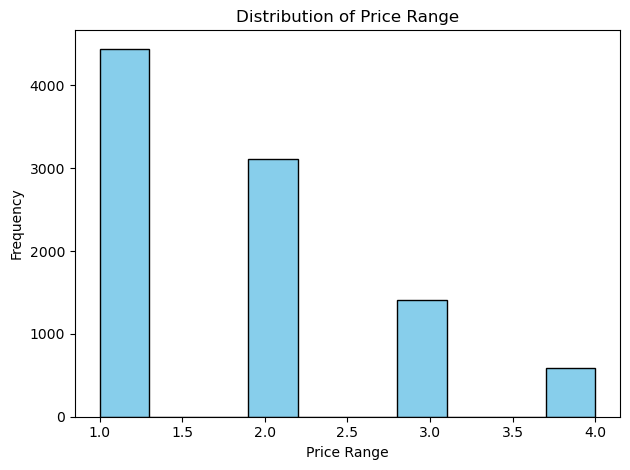

In [71]:
plt.hist(zom_df['Price range'], color='skyblue', edgecolor='black')
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

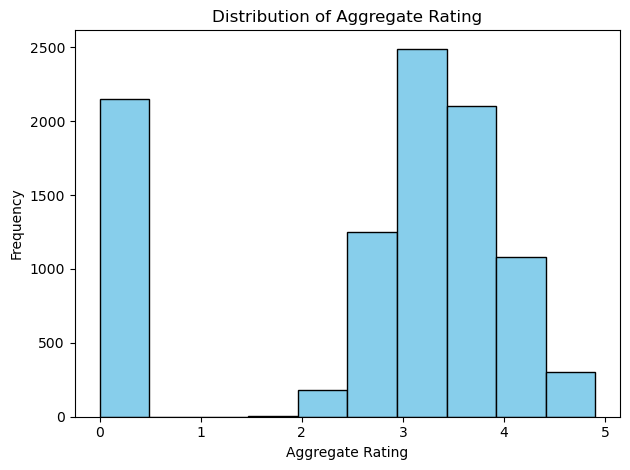

In [72]:
plt.hist(zom_df['Aggregate rating'], color='skyblue', edgecolor='black')
plt.title('Distribution of Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

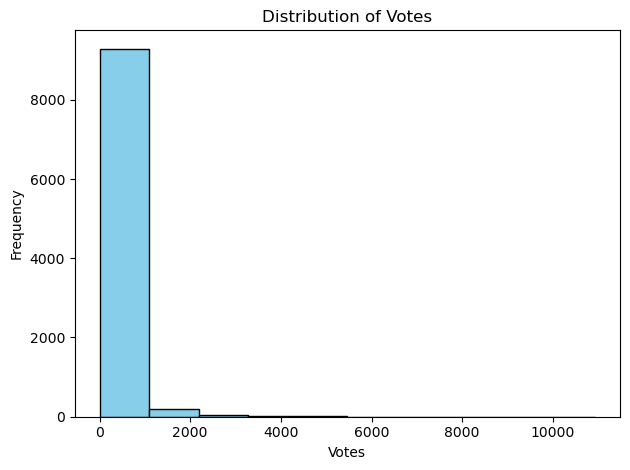

In [73]:
plt.hist(zom_df['Votes'], color='skyblue', edgecolor='black')
plt.title('Distribution of Votes')
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

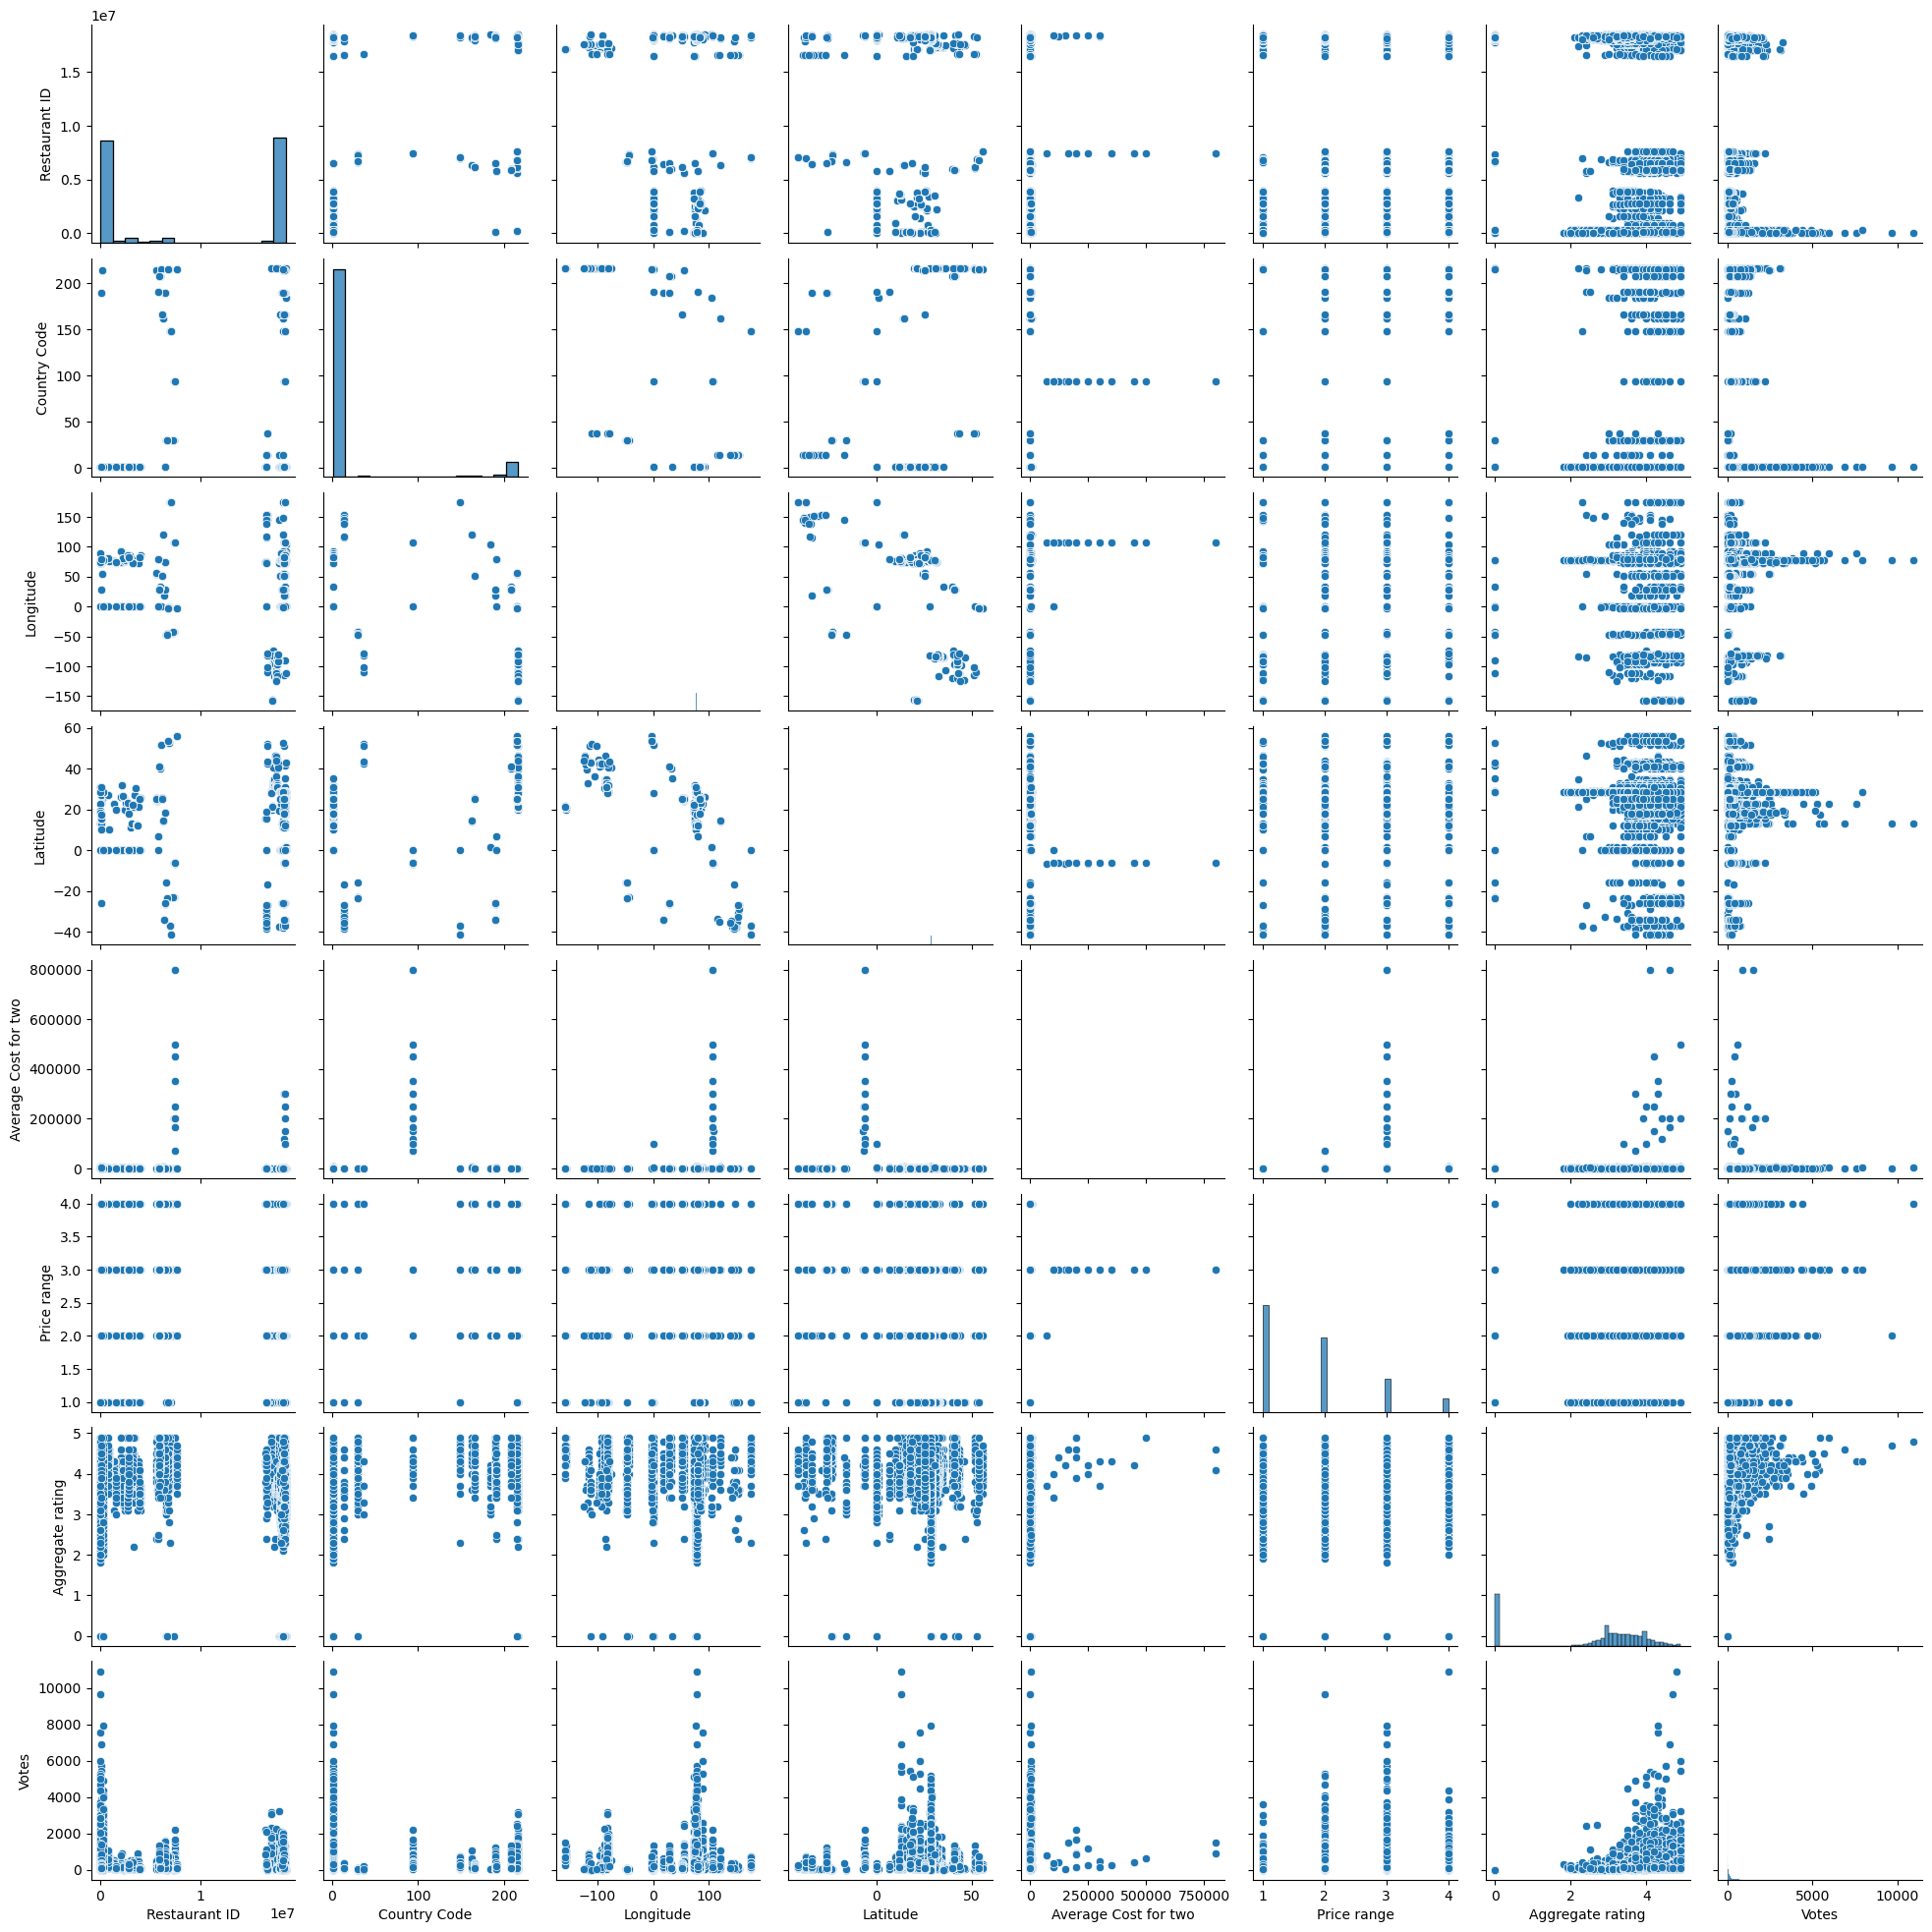

In [74]:
sns.pairplot(zom_df)
plt.show()

Text(0.5, 1.0, 'Has Table Booking')

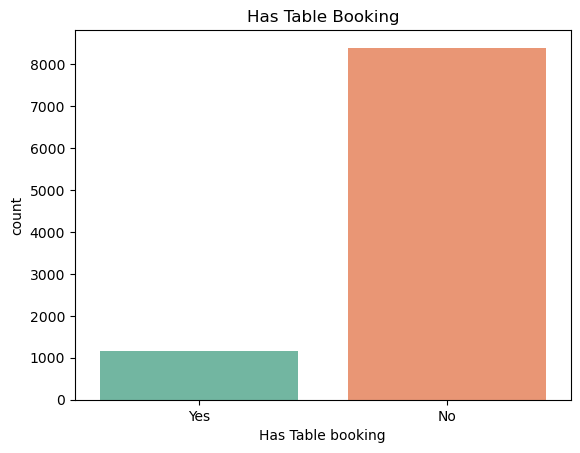

In [75]:
sns.countplot(data=zom_df, x='Has Table booking', palette='Set2')
plt.title('Has Table Booking')

Text(0.5, 1.0, 'Has Online Delivery')

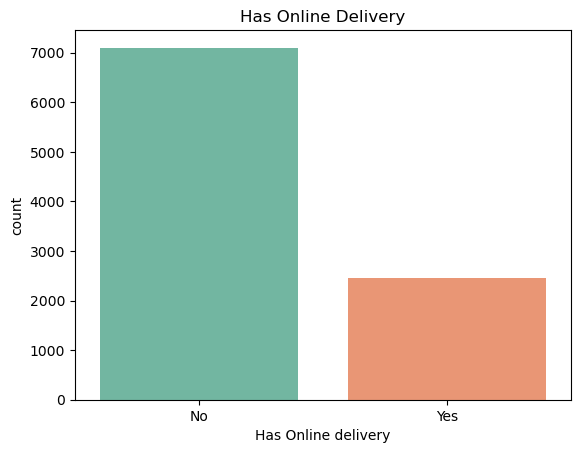

In [76]:
sns.countplot(data=zom_df, x='Has Online delivery', palette='Set2')
plt.title('Has Online Delivery')

Text(0.5, 1.0, 'Rating Text')

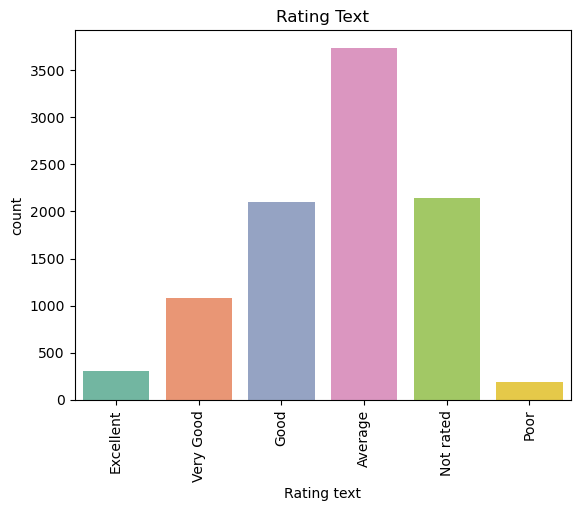

In [77]:
sns.countplot(data=zom_df, x='Rating text', palette='Set2')
plt.xticks(rotation=90)
plt.title('Rating Text')

Text(0.5, 1.0, 'Top 10 Cities by Restaurant Count')

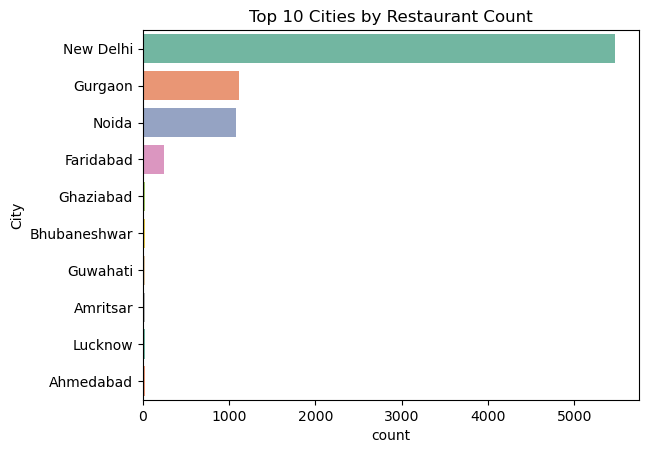

In [78]:
sns.countplot(data=zom_df, y='City', palette='Set2', order=zom_df['City'].value_counts().index[:10])
plt.title('Top 10 Cities by Restaurant Count')

Text(0.5, 1.0, 'Rating Color')

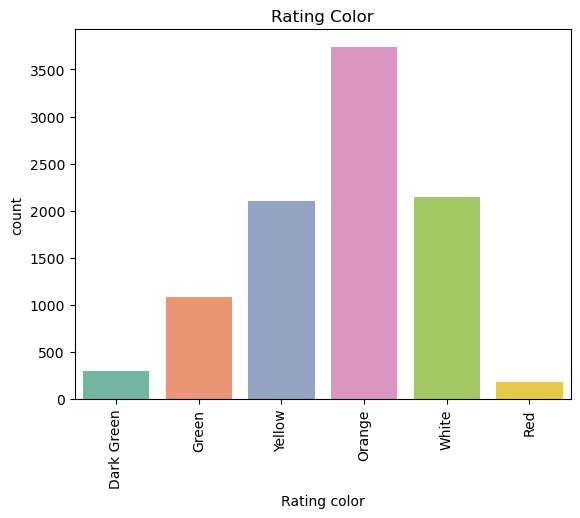

In [79]:
sns.countplot(data=zom_df, x='Rating color', palette='Set2')
plt.xticks(rotation=90)
plt.title('Rating Color')

Text(0.5, 1.0, 'Country')

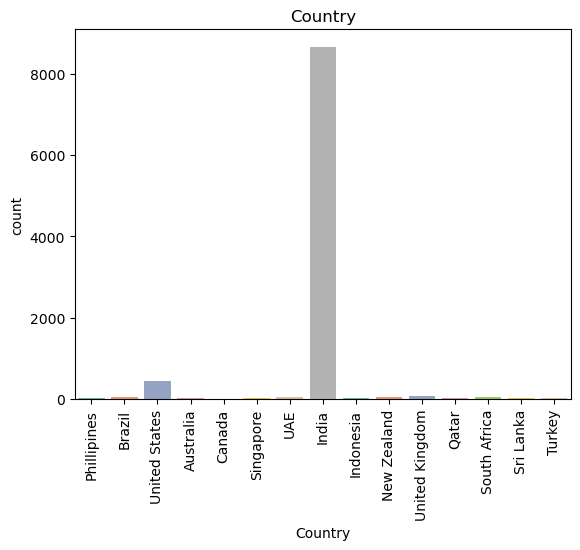

In [80]:
sns.countplot(data=zom_df, x='Country', palette='Set2')
plt.xticks(rotation=90)
plt.title('Country')

Text(0.5, 1.0, 'Currency')

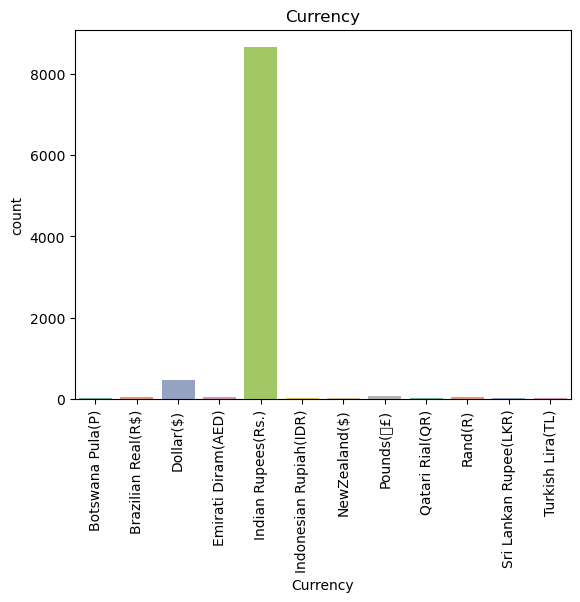

In [81]:
sns.countplot(data=zom_df, x='Currency', palette='Set2')
plt.xticks(rotation=90)
plt.title('Currency')

Text(0.5, 1.0, 'Is Delivering Now')

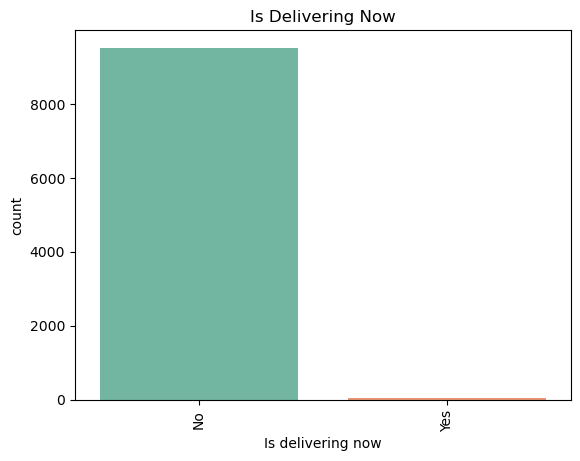

In [82]:
sns.countplot(data=zom_df, x='Is delivering now', palette='Set2')
plt.xticks(rotation=90)
plt.title('Is Delivering Now')

Text(0.5, 1.0, 'Switch to Order Menu')

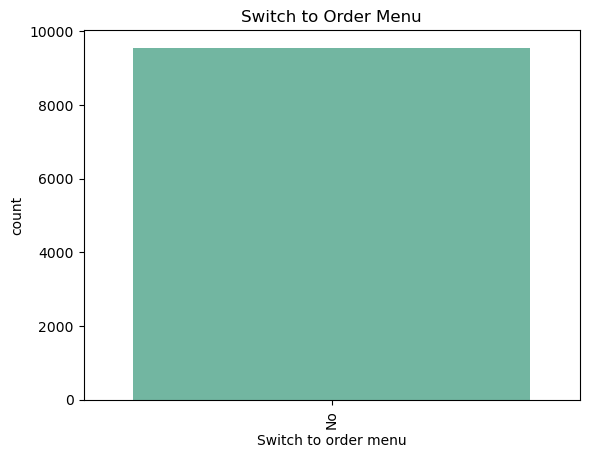

In [83]:
sns.countplot(data=zom_df, x='Switch to order menu', palette='Set2')
plt.xticks(rotation=90)
plt.title('Switch to Order Menu')

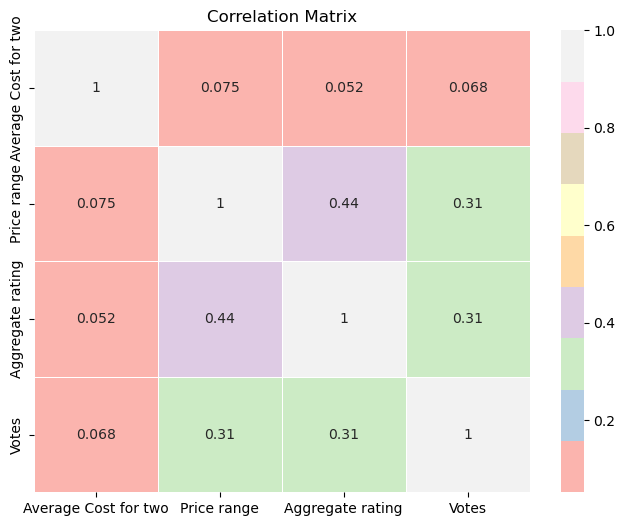

In [84]:
correlation_matrix = zom_df[['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

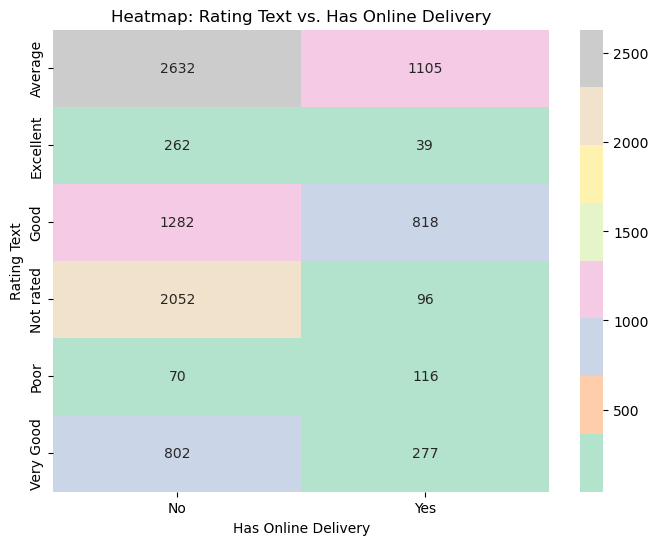

In [85]:
crosstab = pd.crosstab(zom_df['Rating text'], zom_df['Has Online delivery'])
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Pastel2')
plt.title('Heatmap: Rating Text vs. Has Online Delivery')
plt.xlabel('Has Online Delivery')
plt.ylabel('Rating Text')
plt.show()

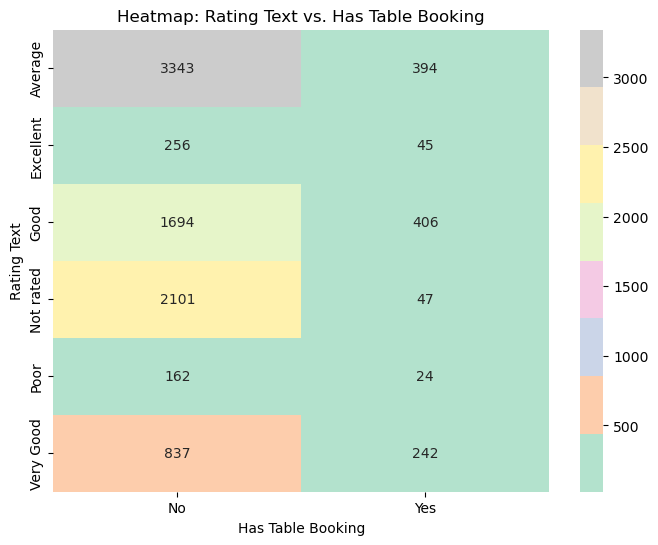

In [86]:
crosstab2 = pd.crosstab(zom_df['Rating text'], zom_df['Has Table booking'])
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab2, annot=True, fmt='d', cmap='Pastel2')
plt.title('Heatmap: Rating Text vs. Has Table Booking')
plt.xlabel('Has Table Booking')
plt.ylabel('Rating Text')
plt.show()

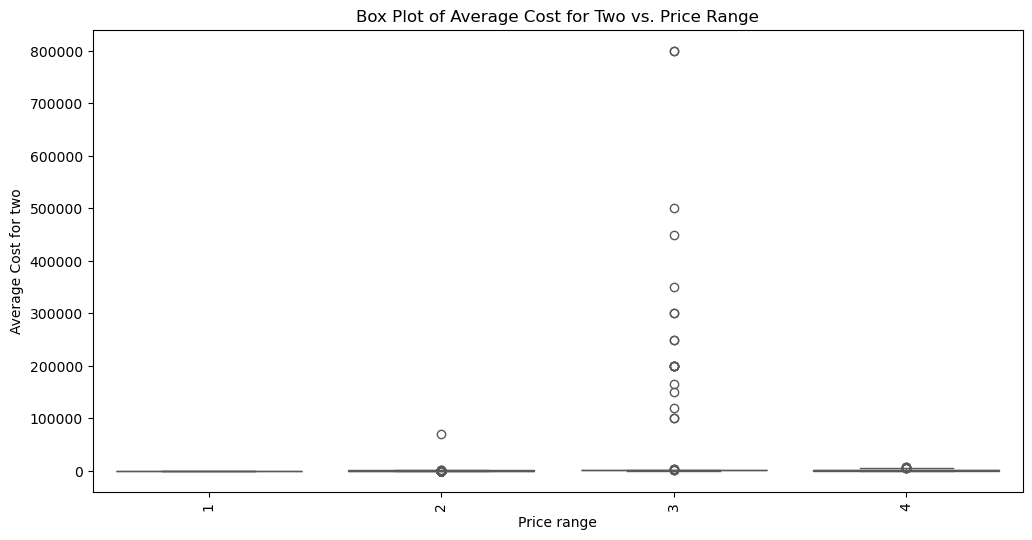

In [87]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=zom_df, x='Price range', y='Average Cost for two', palette='Set2')
plt.title('Box Plot of Average Cost for Two vs. Price Range')
plt.xticks(rotation=90)
plt.show()

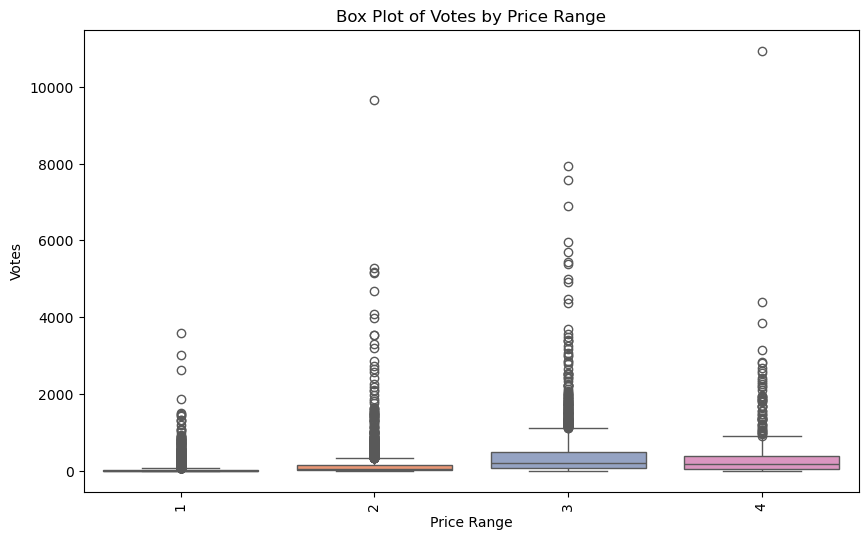

In [88]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=zom_df, x='Price range', y='Votes', palette='Set2')
plt.title('Box Plot of Votes by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Votes')
plt.xticks(rotation=90)
plt.show()

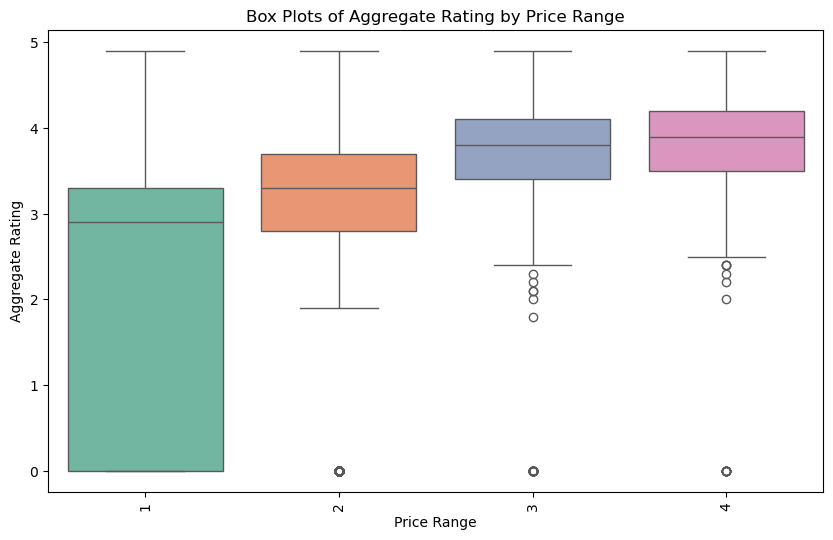

In [89]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=zom_df, x='Price range', y='Aggregate rating', palette='Set2')
plt.title('Box Plots of Aggregate Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.xticks(rotation=90)
plt.show()

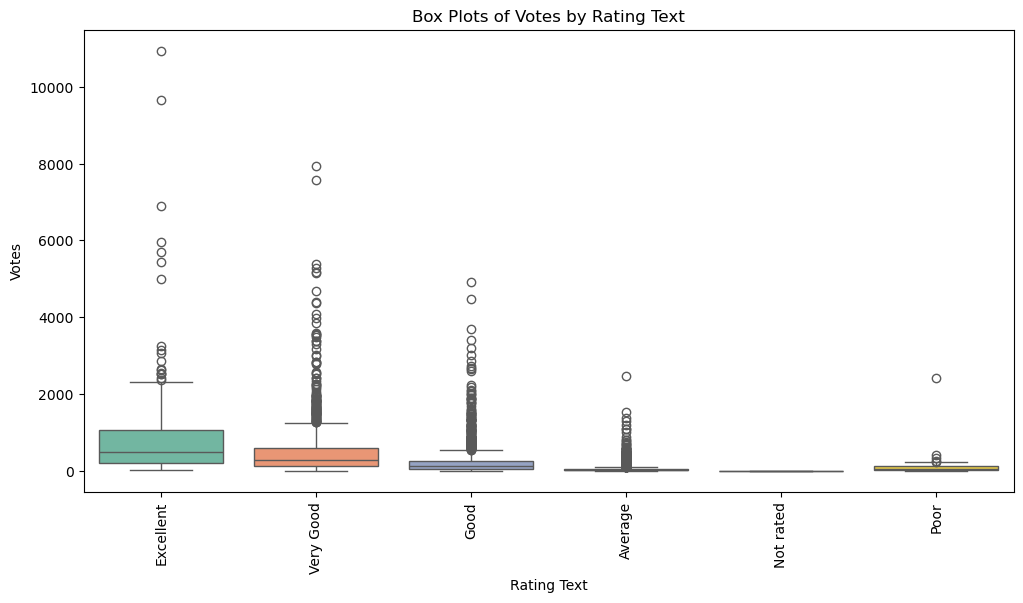

In [90]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=zom_df, x='Rating text', y='Votes', palette='Set2')
plt.title('Box Plots of Votes by Rating Text')
plt.xlabel('Rating Text')
plt.ylabel('Votes')
plt.xticks(rotation=90)
plt.show()

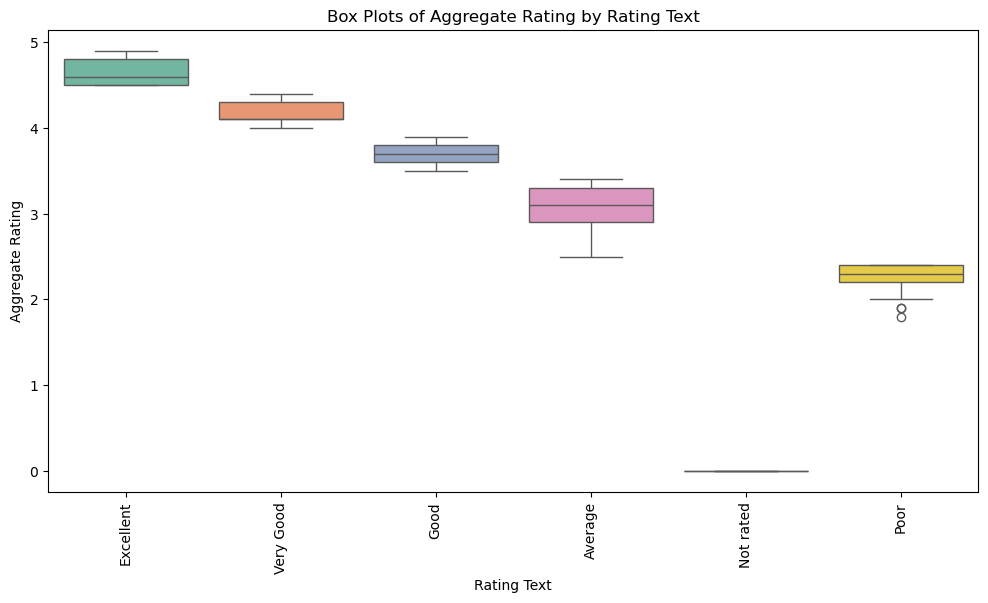

In [91]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=zom_df, x='Rating text', y='Aggregate rating', palette='Set2')
plt.title('Box Plots of Aggregate Rating by Rating Text')
plt.xlabel('Rating Text')
plt.ylabel('Aggregate Rating')
plt.xticks(rotation=90)
plt.show()

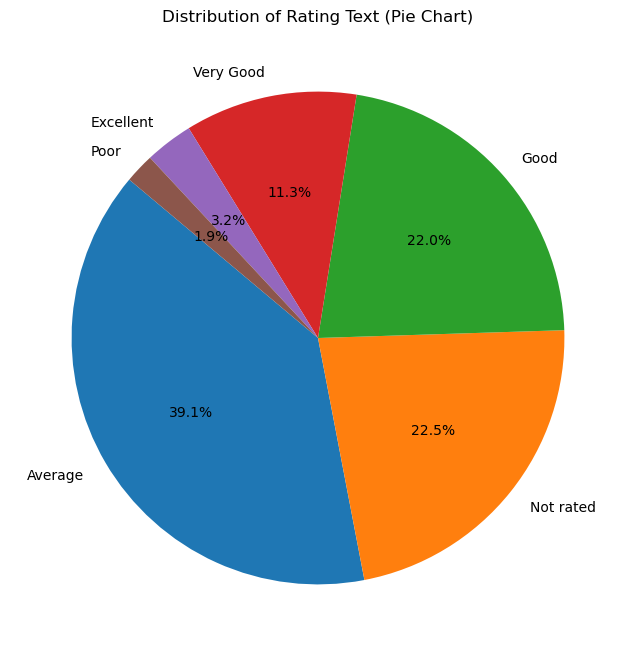

In [92]:
rating_counts = zom_df['Rating text'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Rating Text (Pie Chart)')
plt.show()

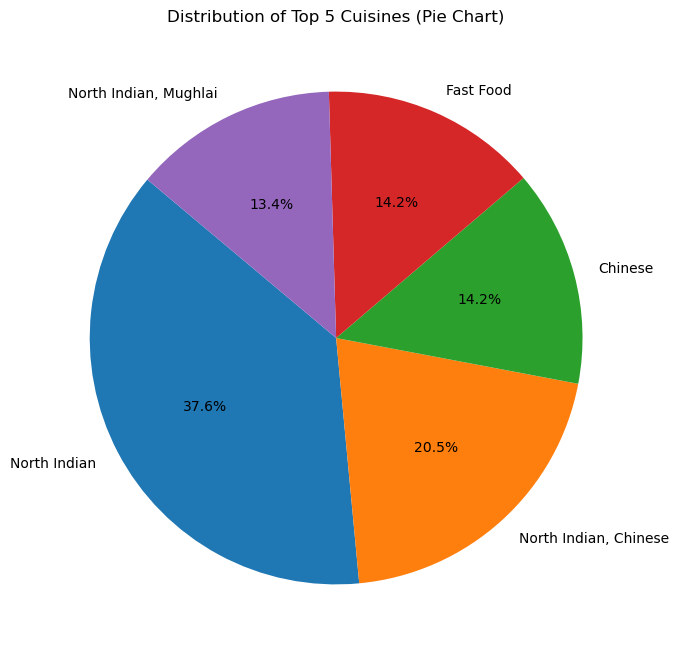

In [93]:
top_cuisines = zom_df['Cuisines'].value_counts().head(5)
plt.figure(figsize=(8, 8))
plt.pie(top_cuisines, labels=top_cuisines.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Top 5 Cuisines (Pie Chart)')
plt.show()

In [94]:
from sklearn.preprocessing import OrdinalEncoder

In [95]:
ordinal_encoder = OrdinalEncoder()

In [96]:
zom_df['Has Table booking'] = ordinal_encoder.fit_transform(zom_df['Has Table booking'].values.reshape(-1,1))
zom_df['Has Online delivery'] = ordinal_encoder.fit_transform(zom_df['Has Online delivery'].values.reshape(-1,1))
zom_df['Is delivering now'] = ordinal_encoder.fit_transform(zom_df['Is delivering now'].values.reshape(-1,1))
zom_df['Switch to order menu'] = ordinal_encoder.fit_transform(zom_df['Switch to order menu'].values.reshape(-1,1))
zom_df['Cuisines'] = ordinal_encoder.fit_transform(zom_df['Cuisines'].values.reshape(-1,1))
zom_df['City'] = ordinal_encoder.fit_transform(zom_df['City'].values.reshape(-1,1))
zom_df['Rating text'] = ordinal_encoder.fit_transform(zom_df['Rating text'].values.reshape(-1,1))
zom_df['Rating color'] = ordinal_encoder.fit_transform(zom_df['Rating color'].values.reshape(-1,1))
zom_df['Locality'] = ordinal_encoder.fit_transform(zom_df['Locality'].values.reshape(-1,1))
zom_df['Locality Verbose'] = ordinal_encoder.fit_transform(zom_df['Locality Verbose'].values.reshape(-1,1))
zom_df['Price range'] = ordinal_encoder.fit_transform(zom_df['Price range'].values.reshape(-1,1))

In [97]:
zom_df = zom_df.drop(['Restaurant Name', 'Address', 'Currency', 'Restaurant ID', 'Country'], axis=1)

In [98]:
zom_df.isnull().sum()

Country Code            0
City                    0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [99]:
zom_df=zom_df.dropna()

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_cost = zom_df.drop(['Average Cost for two'], axis=1)
y_cost = zom_df['Average Cost for two']

In [103]:
from sklearn.preprocessing import StandardScaler

In [104]:
scaler = StandardScaler()

In [109]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X_cost),columns=X_cost.columns)
X

,Country Code,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,2.547817,-0.229701,-1.543504,-1.524518,1.377641,-1.024849,-0.134480,2.690738,-0.58792,-0.059799,0.0,1.319726,1.407683,-1.978385,-0.465528,0.365493
1,2.547817,-0.229701,-0.206783,-0.230612,1.377315,-1.025915,0.236899,2.690738,-0.58792,-0.059799,0.0,1.319726,1.209860,-1.978385,-0.465528,1.009408
2,2.547817,-0.143353,-1.109544,-1.096232,1.378352,-1.023399,1.325758,2.690738,-0.58792,-0.059799,0.0,2.424069,1.143919,-1.308391,1.894763,0.263210
3,2.547817,-0.143353,0.645298,0.595799,1.378344,-1.023043,0.266064,-0.371645,-0.58792,-0.059799,0.0,2.424069,1.473624,-1.978385,-0.465528,0.484048
4,2.547817,-0.143353,0.645298,0.595799,1.378369,-1.023122,0.258287,2.690738,-0.58792,-0.059799,0.0,2.424069,1.407683,-1.978385,-0.465528,0.167901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9537,3.362717,2.662944,-0.447519,-0.465867,-0.856833,1.378286,1.601862,-0.371645,-0.58792,-0.059799,0.0,1.319726,0.946096,-1.308391,1.894763,1.467355
9538,3.362717,2.662944,-0.336654,-0.360304,-0.855281,1.377110,1.623250,-0.371645,-0.58792,-0.059799,0.0,1.319726,1.012037,-1.308391,1.894763,2.039208
9539,3.362717,2.662944,-0.330318,-0.351256,-0.855443,1.381285,0.234954,-0.371645,-0.58792,-0.059799,0.0,2.424069,0.682332,1.371585,0.124545,1.172130
9540,3.362717,2.662944,-0.330318,-0.351256,-0.855410,1.381482,1.298536,-0.371645,-0.58792,-0.059799,0.0,2.424069,0.880155,-1.308391,1.894763,1.730035


In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [108]:
y_cost_pred_linear = linear_reg_model.predict(X_cost_test_scaled)

In [110]:
maxAccu=0
maxRS=0
for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y_cost, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.06930999329403442 on Random State 310


In [111]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y_cost, test_size=0.25, random_state=310)

In [112]:
from sklearn.model_selection import cross_val_score

In [113]:
def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=623)
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    rmse = mean_squared_error(Y_test, pred,squared=False)
    print("RMSE Score is:", rmse)
    r2 = r2_score(Y_test, pred)*100
    print("R2 Score is:", r2)
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

In [115]:
model=LinearRegression()
reg(model,X,y_cost)

RMSE Score is: 11750.771347059817
R2 Score is: 2.082744658587532
Cross Validation Score: -4523.961503384801
R2 Score - Cross Validation Score is 4526.0442480433885


In [116]:
from sklearn.linear_model import Ridge

In [118]:
model=Ridge()
reg(model,X,y_cost)

RMSE Score is: 11749.589006874014
R2 Score is: 2.102448161974768
Cross Validation Score: -4505.855697264651
R2 Score - Cross Validation Score is 4507.958145426626


In [119]:
from sklearn.linear_model import Ridge

In [121]:
model=Ridge()
reg(model,X,y_cost)

RMSE Score is: 11749.589006874014
R2 Score is: 2.102448161974768
Cross Validation Score: -4505.855697264651
R2 Score - Cross Validation Score is 4507.958145426626


In [122]:
from sklearn.linear_model import Lasso

In [124]:
model=Lasso()
reg(model,X,y_cost)

RMSE Score is: 11746.878369339804
R2 Score is: 2.1476130044988606
Cross Validation Score: -4470.857654514849
R2 Score - Cross Validation Score is 4473.005267519347


In [125]:
from sklearn.svm import SVR

In [126]:
model=SVR(C=1.0, epsilon=0.2, kernel='poly')
reg(model, X, y_cost)

RMSE Score is: 11882.642261800966
R2 Score is: -0.12730460579308822
Cross Validation Score: 23.24183249988821
R2 Score - Cross Validation Score is -23.3691371056813


In [127]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [128]:
model=DecisionTreeRegressor()
reg(model, X, y_cost)

RMSE Score is: 7956.148121264066
R2 Score is: 55.11179903241627
Cross Validation Score: -631756.2348166824
R2 Score - Cross Validation Score is 631811.3466157148


In [129]:
model=RandomForestRegressor(max_depth=2)
reg(model, X, y_cost)

RMSE Score is: 4492.824763877062
R2 Score is: 85.68585408148917
Cross Validation Score: -70472.10389850069
R2 Score - Cross Validation Score is 70557.78975258218


In [130]:
model=KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, y_cost)

RMSE Score is: 9298.25272463273
R2 Score is: 38.69030263281136
Cross Validation Score: -27274.595049570235
R2 Score - Cross Validation Score is 27313.285352203045


In [131]:
model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, y_cost)

RMSE Score is: 7005.547979554162
R2 Score is: 65.19747902124293
Cross Validation Score: -17402.15167320819
R2 Score - Cross Validation Score is 17467.349152229435


In [132]:
model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, y_cost)

RMSE Score is: 15390.83921593574
R2 Score is: -67.97748816568713
Cross Validation Score: -75559.07934119274
R2 Score - Cross Validation Score is 75491.10185302705


In [133]:
model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, y_cost)

RMSE Score is: 5661.751404454719
R2 Score is: 77.26850112417125
Cross Validation Score: -4990.73982972203
R2 Score - Cross Validation Score is 5068.008330846201


In [134]:
model=XGBRegressor()
reg(model, X, y_cost)

RMSE Score is: 7649.646904399491
R2 Score is: 58.503711074629074
Cross Validation Score: -22800.788407719992
R2 Score - Cross Validation Score is 22859.292118794623


In [135]:
fmod_param = {'fit_intercept' : [True, False],
              'copy_X' : [True, False],
              'positive' : [True, False],
              'n_jobs' : [-2, -1, 1]
              }

In [136]:
from sklearn.model_selection import GridSearchCV

In [137]:
GSCV = GridSearchCV(LinearRegression(), fmod_param, cv=5)

In [138]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [-2, -1, 1],
                         'positive': [True, False]})

In [139]:
GSCV.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': -2, 'positive': True}

In [140]:
Final_Model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs= -2,positive=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 3.9610197248452717


In [146]:
import joblib
joblib.dump(Final_Model,'Zomato_Avg_cost.pkl')

['Zomato_Avg_cost.pkl']

In [148]:
model=joblib.load("Zomato_Avg_cost.pkl")
prediction=model.predict(X_test)
prediction

array([ -36.49287309,  962.45196578, 1127.12742316, ..., 2572.42859499,
        216.72795336, 2832.60436927])

In [149]:
a=np.array(Y_test)
df1=pd.DataFrame()
df1['Predicted']=prediction
df1['Actual']=a
df1

,Predicted,Actual
0,-36.492873,2000
1,962.451966,300
2,1127.127423,500
3,2210.733490,500
4,-1841.769982,150
...,...,...
2381,2191.462226,700
2382,2131.516464,650
2383,2572.428595,450
2384,216.727953,450


In [141]:
X_price_range = zom_df.drop(['Price range'], axis=1)
y_price_range = zom_df['Price range']

In [142]:
X_price_train, X_price_test, y_price_train, y_price_test = train_test_split(X_price_range, y_price_range, test_size=0.2, random_state=42)

In [154]:
X_price_train_encoded = pd.get_dummies(X_price_train, columns=['Country Code', 'City', 'Rating text', 'Rating color'],drop_first=True,dtype=int)

In [155]:
X_price_test_encoded = pd.get_dummies(X_price_test, columns=['Country Code', 'City', 'Rating text', 'Rating color'],drop_first=True,dtype=int)

In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [157]:
logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(X_price_train_encoded, y_price_train)

LogisticRegression()

In [158]:
X_price_train_encoded

,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,...,Rating text_1.0,Rating text_2.0,Rating text_3.0,Rating text_4.0,Rating text_5.0,Rating color_1.0,Rating color_2.0,Rating color_3.0,Rating color_4.0,Rating color_5.0
8177,598.0,606.0,77.353663,28.574219,1699.0,450,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
6401,814.0,825.0,77.134360,28.671141,1626.0,700,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
81,1154.0,1211.0,-46.746958,-23.609207,1171.0,120,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,0,0,0,0
1332,252.0,258.0,77.086080,28.482318,1275.0,300,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0
9041,1014.0,1067.0,77.339801,28.586405,58.0,500,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5743,699.0,710.0,77.052860,28.664641,1329.0,250,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0
5200,639.0,650.0,77.211180,28.536406,241.0,300,0.0,1.0,0.0,0.0,...,0,0,0,0,1,1,0,0,0,0
5399,608.0,617.0,77.128051,28.478595,1306.0,500,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
869,87.0,88.0,77.305745,28.490062,177.0,100,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0


In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [160]:
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X_price_range, y_price_range,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.7942717429269996 on Random_state 181


In [162]:
X_train, X_test, Y_train, Y_test = train_test_split(X_price_range, y_price_range,random_state=181, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7942717429269996


Confusion matrix of Logistics Regression : 
 [[1177  106   30    1]
 [  78  800   61    1]
 [  11  126  295    4]
 [   6   29  136    2]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

         0.0       0.93      0.90      0.91      1314
         1.0       0.75      0.85      0.80       940
         2.0       0.57      0.68      0.62       436
         3.0       0.25      0.01      0.02       173

    accuracy                           0.79      2863
   macro avg       0.62      0.61      0.59      2863
weighted avg       0.77      0.79      0.78      2863



In [163]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error

In [164]:
rmse_val = [] 
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_test)
    error = sqrt(mean_squared_error(Y_test,y_pred))
    rmse_val.append(error)
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.4589316208577511
RMSE value for k=  2 is: 0.482310193338968
RMSE value for k=  3 is: 0.492699053852129
RMSE value for k=  4 is: 0.47169257735368525
RMSE value for k=  5 is: 0.48699467572133587
RMSE value for k=  6 is: 0.4833952570125925
RMSE value for k=  7 is: 0.48699467572133587
RMSE value for k=  8 is: 0.4808596330814318
RMSE value for k=  9 is: 0.4797688347773452
RMSE value for k=  10 is: 0.48447789052326007
RMSE value for k=  11 is: 0.4880693250804917
RMSE value for k=  12 is: 0.492699053852129
RMSE value for k=  13 is: 0.49234446650583696
RMSE value for k=  14 is: 0.492699053852129
RMSE value for k=  15 is: 0.501482259769406
RMSE value for k=  16 is: 0.5035674340846767
RMSE value for k=  17 is: 0.502873336671267
RMSE value for k=  18 is: 0.5073679969382675
RMSE value for k=  19 is: 0.5087429804809236
RMSE value for k=  20 is: 0.5087429804809236


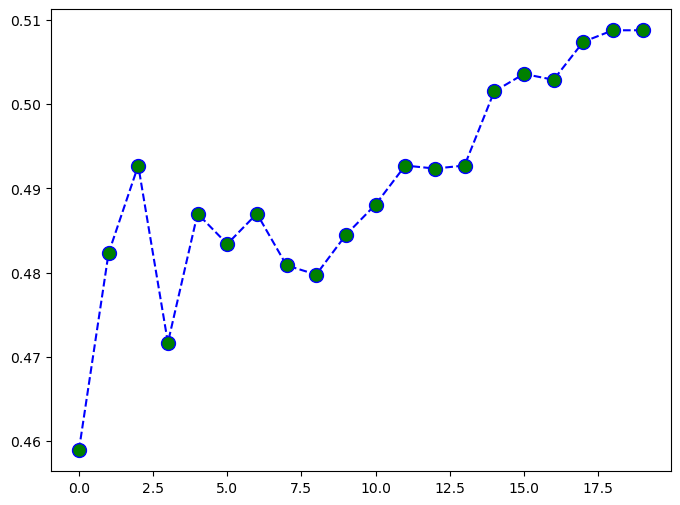

In [165]:
plt.figure(figsize = (8,6))
plt.plot(range(20), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

In [170]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [171]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.7942717429269996


Confusion matrix : 
 [[1177  106   30    1]
 [  78  800   61    1]
 [  11  126  295    4]
 [   6   29  136    2]]


Classification Report : 
               precision    recall  f1-score   support

         0.0       0.93      0.90      0.91      1314
         1.0       0.75      0.85      0.80       940
         2.0       0.57      0.68      0.62       436
         3.0       0.25      0.01      0.02       173

    accuracy                           0.79      2863
   macro avg       0.62      0.61      0.59      2863
weighted avg       0.77      0.79      0.78      2863



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.7114914425427873


Confusion matrix : 
 [[1306    8    0    0]
 [ 422  511    7    0]
 [  78  167  191    0]
 [  47    9   88   29]]


Classification Report : 
               precision    recall  f1-score   support

         0.0     

In [172]:
from sklearn.model_selection import cross_val_score

In [174]:
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m,X_price_range, y_price_range,cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.52959665 0.7993714  0.85010482 0.75366876 0.73637317]
Mean Score : 0.7338229593243084
Std deviation : 0.10947768300038023




Cross Validation Score SVC() :

Score : [0.64693557 0.77946569 0.78092243 0.73322851 0.80922432]
Mean Score : 0.7499553038514464
Std deviation : 0.05698331938021656




Cross Validation Score GaussianNB() :

Score : [0.27710843 0.63907805 0.61582809 0.59643606 0.64937107]
Mean Score : 0.5555643410393007
Std deviation : 0.14043799441661586




Cross Validation Score DecisionTreeClassifier() :

Score : [0.386066   0.96123625 0.9942348  0.99790356 0.88993711]
Mean Score : 0.8458755448372655
Std deviation : 0.23315115932142685




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.69879518 0.88318491 0.88469602 0.93710692 0.83542977]
Mean Score : 0.847842559738544
Std deviation : 0.08117214241789573




Cross Validation Score RandomForestClassifier() :

Score : [0.45154531 0.95809324 0

In [175]:
from sklearn.model_selection import GridSearchCV

In [176]:
parameter= {'criterion' : ['gini', 'entropy'],
             'max_features':['auto','sqrt','log2'],
              'min_samples_split':[3,5,8,11],
              'max_depth' : [10,20,30],
              'n_estimators' : [10,20,30,40]
             }

In [177]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=10
[CV 1/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=10;, score=0.770 total time=   0.0s
[CV 2/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=10
[CV 2/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=10;, score=0.732 total time=   0.0s
[CV 3/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=10
[CV 3/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=10;, score=0.720 total time=   0.0s
[CV 4/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=10
[CV 4/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [3, 5, 8, 11],
                         'n_estimators': [10, 20, 30, 40]},
             verbose=10)

In [178]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'log2',
 'min_samples_split': 5,
 'n_estimators': 40}

In [179]:
Final_mod = ExtraTreesClassifier(criterion='entropy',n_estimators=30, max_depth=30 ,
                                 min_samples_split= 5, max_features= 'log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.9294446384910933


In [182]:
import joblib
joblib.dump(Final_mod,'Price_Range_Final.pkl')

['Price_Range_Final.pkl']

In [183]:
model=joblib.load("Price_Range_Final.pkl")
prediction=model.predict(X_test)
prediction

array([0., 3., 0., ..., 0., 3., 1.])

In [184]:
a=np.array(Y_test)
df1=pd.DataFrame()
df1['Predicted']=prediction
df1['Actual']=a
df1

,Predicted,Actual
0,0.0,0.0
1,3.0,3.0
2,0.0,0.0
3,1.0,1.0
4,1.0,1.0
...,...,...
2858,1.0,1.0
2859,0.0,0.0
2860,0.0,0.0
2861,3.0,3.0
